# Introduction

<hr>

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of clothing images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [1]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Dataset consists of 60,000 images of clothes, each given one of 1 labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
assert train_images.shape == (60000, 28, 28)
# In order to distinguish a 1-tuple, vs a number in parentheses, we add a trailing comma
assert train_labels.shape == (60000,)
assert test_images.shape == (10000, 28, 28)
assert test_labels.shape == (10000,)

flabels = {0 : 't-shirt',
           1 : 'trousers',
           2 : 'pullover',
           3 : 'dress',
           4 : 'coat',
           5 : 'sandal',
           6 : 'shirt',
           7 : 'sneaker',
           8 : 'bag',
           9 : 'boot'}


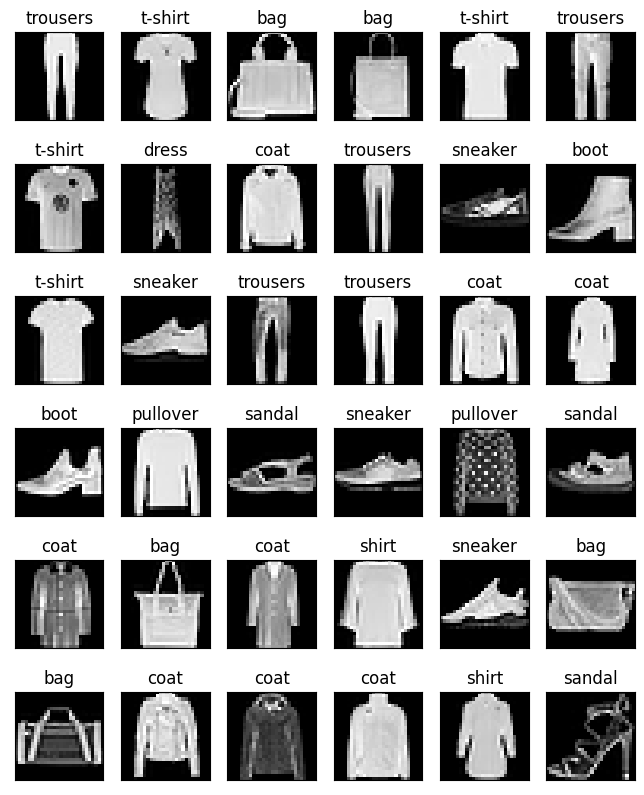

In [2]:
# display some images with their labels
fig = plt.figure(figsize=(8, 10))
N = 6
st_idx = R.randint(0, train_images.shape[0]-N*N-1)
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.imshow(train_images[st_idx+i], cmap='gray', interpolation='none')
    plt.title(flabels[train_labels[st_idx+i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

**Preprocessing**
1. Reshape images into 1-d arrays that can be given as input into network
2. Normalize pixel values
3. Convert training labels -> one hot training labels
4. Separate training images into 2 categories

In [3]:
# (1) 
train_pats = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
test_pats = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))

# (2)
train_pats = train_pats.astype('float') / 255
test_pats = test_pats.astype('float') / 255

# (3)
from tensorflow.keras.utils import to_categorical
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# (4)
train_pats_half1 = train_pats[:int(train_pats.shape[0] / 2)]
train_pats_half2 = train_pats[int(train_pats.shape[0] / 2):]
train_labels_onehot_half2 = train_labels_onehot[int(train_pats.shape[0] / 2):]

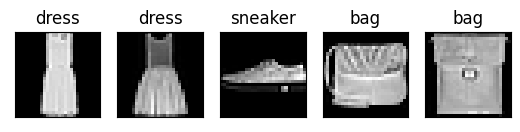

In [4]:
## Testing if training patterns were divded up correctly
for i in np.arange(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_pats_half2[i].reshape((28,28)), cmap="gray", interpolation=None)
    plt.title(flabels[np.argmax(train_labels_onehot_half2[i])])
    plt.xticks([])
    plt.yticks([])
    


In [5]:
img_x = train_images.shape[1]
img_y = train_images.shape[2]
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("train_pats shape:", train_pats.shape)
print("test_pats shape:", test_pats.shape)
print("half training patterns:", train_pats_half1.shape)
print(train_labels_onehot.shape)
print(test_labels_onehot.shape)


Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)
train_pats shape: (60000, 784)
test_pats shape: (10000, 784)
half training patterns: (30000, 784)
(60000, 10)
(10000, 10)


In [16]:
###### Helper Functions
def create_loss_vs_epoch(history):
    loss, val_loss = history.history['loss'], history.history["val_loss"]
#plt.figure(figsize=(4,2))
    plt.plot(loss, label="loss")
    plt.plot(val_loss, label="val_loss")
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss over Epochs");

def create_accuracy_plt(history):
    # Plotting accuracy over epoch
    accuracy = history.history['accuracy']
    print("Maximum accuracy achieved:", np.max(accuracy))
#plt.figure(figsize=(5,3))
# plt.subplot(1,2,1)  
    plt.plot(accuracy, label="accuracy")
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training Accuracy over Epochs");

# Question 1

### a) Creating autoassociator network that produces a lower dimension representation of the images of clothing in its hidden layer

In [6]:
from tensorflow.keras import models, layers
def create_autoassociator(train_epochs, nhid):
    aanetwork = models.Sequential()

    nin = img_x * img_y
    nhid = nhid
    nout = nin

    # Hidden layer
    aanetwork.add(
        layers.Dense(
            nhid, 
            activation='linear',
            input_shape= (nin,)
        )
    )

    # Output layer
    aanetwork.add(
        layers.Dense(
            nout, 
            activation='linear',
        )
    )

    # compile network
    aanetwork.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy', 'mse'])

    # Training the network
    history = aanetwork.fit(
                            x=train_pats_half1, 
                            y=train_pats_half1,
                            validation_split=.1,
                            verbose= False,
                            epochs= train_epochs,
                            batch_size=50
                            )
    out = aanetwork.predict(train_pats)

    plt.figure(figsize=(4,2))
    for i in np.arange(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(train_pats[i].reshape((28,28)), cmap ='gray', interpolation=None)
        plt.title(flabels[train_labels[i]])
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(2,5,i+6)
        plt.imshow(out[i].reshape((28,28)), cmap ='gray', interpolation=None)
        plt.title(flabels[train_labels[i]])
        plt.xticks([])
        plt.yticks([])

    return aanetwork, history


In [7]:
nhid_aa = int(train_pats.shape[1] / 3)
print(nhid_aa, ": dimension of lower dimensional representation of clothing image")

261 : dimension of lower dimensional representation of clothing image


1875/1875 [==============================] - 4s 2ms/step


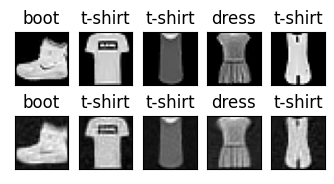

In [8]:
aanetwork, history_good = create_autoassociator(25, nhid_aa)

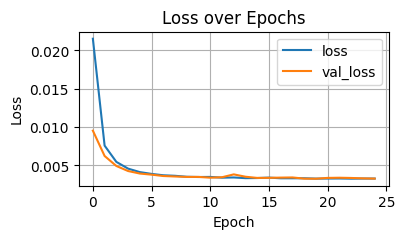

In [9]:
create_loss_vs_epoch(history_good)

**Justification**
* Epochs - As the number of training epochs increased past 20, `loss` flattens out and stays about the same, while val_loss began to spike upwards, suggesting the network might be overfitting (when epochs > 20)
* Dimension of hidden layer - tried 49, 100, 196, 261, 289, 350, 400 units:
    * both 49 and 100 units were extremely blurry
    * 196 and 261 had similar performance, with 261 performing slightly better recreating the shoe
    * increasing to 350, 400 units made little difference (dimensionality reduction)

1875/1875 [==============================] - 3s 2ms/step


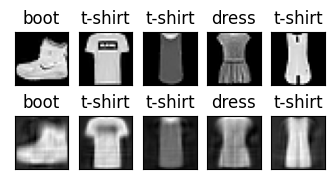

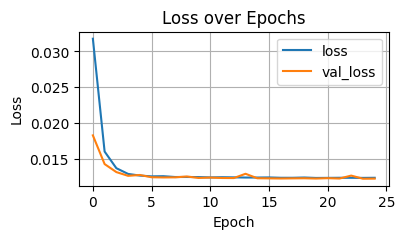

In [10]:
aanetwork_bad, history_bad = create_autoassociator(25, int(train_pats.shape[1] / 16))
create_loss_vs_epoch(history_bad)


### b) Use your autoassociator to make reduced-dimensionality training patterns for classification.

(1) First we create reduced dimension patterns

In [11]:
# First get the weight and biases projecting for the first layer
aaW = aanetwork.layers[0].get_weights()[0]
aaB = aanetwork.layers[0].get_weights()[1]
reduced_training_pats = np.dot(train_pats_half2, aaW) + aaB

In [12]:
print(train_pats_half2.shape, ": (records, activations)")
print(aaW.shape, ": (input nodes, output node)")
print(reduced_training_pats.shape)

(30000, 784) : (records, activations)
(784, 261) : (input nodes, output node)
(30000, 261)


(2) Now, we use these reduced dimensional patters to train classifcation NN 

In [37]:
# Creating multi-layer neural network
def create_reduced_clothes_classifier(epochs, nhid1, nhid2, hid2 = False):
    clothes_classifier = models.Sequential()

    nin = reduced_training_pats.shape[1]
    nhid1 = nhid1
    nhid2 = nhid2
    nout = len(flabels)
    
    clothes_classifier.add(
        layers.Dense(
            nhid1,
            activation="relu",
            input_shape = (nin, )
        )
    )

    if hid2:
        clothes_classifier.add(
            layers.Dense(
                nhid2,
                activation="sigmoid",
            )
        )

    clothes_classifier.add(
        layers.Dense(
            nout,
            activation ="softmax"
        )
    )

    # compile network
    clothes_classifier.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

    train_epochs = epochs

    # Training the network
    history = clothes_classifier.fit(
                            x=reduced_training_pats, 
                            y=train_labels_onehot_half2,
                            validation_split=.1,
                            verbose= False,
                            epochs=train_epochs,
                            batch_size=50
                            )
                            
    # Plotting accuracy over epoch
    accuracy = history.history['accuracy']
    print("Maximum accuracy achieved:", np.max(accuracy))
    plt.figure(figsize=(5,3))
    plt.subplot(1,2,1)  
    plt.plot(accuracy, label="accuracy")
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training Accuracy over Epochs");
    
    create_loss_vs_epoch(history)
    

    return clothes_classifier


**Justification of architecture**
* Epochs - `val_loss` tends to level out after 20 - 25 epochs
* nhid units - Tried with 10, 20, 30 , 50 units for first hidden layer, `30 units` worked best
* nhid layers 
    * with 1 layer, nn tend to settle around loss of .2 and accuracy of .9
    * with 2 layers, nn tended to do slightly better with accuracy of .95 (but leads to overfitting)
* activation - `softmax` with `categorical_crossentropy` and  `sigmoid` with `mse` had similar performances


Maximum accuracy achieved: 0.9094444513320923


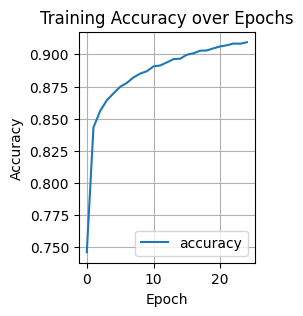

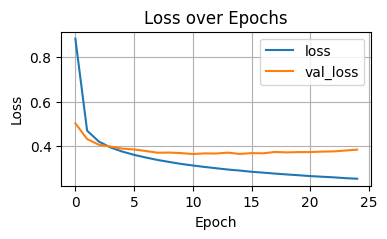

In [40]:
classifier_net = create_reduced_clothes_classifier(epochs=25, nhid1 = 25, nhid2 = 0, hid2= False)

Maximum accuracy achieved: 0.9403703808784485


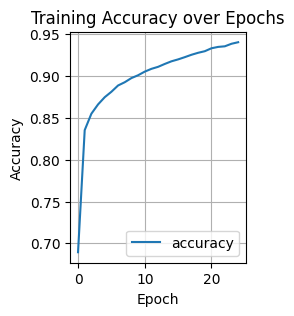

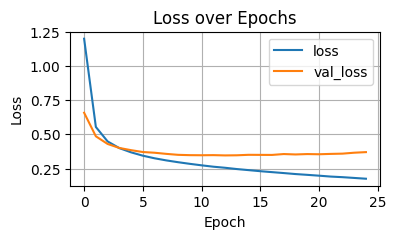

In [41]:
classifier_net_2layer = create_reduced_clothes_classifier(epochs=25, nhid1 = 50, nhid2 = 20, hid2= True)

### c) Test multi-layer classifer on testing images

Once you have a good network that attains a high accuracy on the training patterns, test
your network using the test images and report its performance (using
network.evaluate()). Note that you’ll have to create a set of reduced testing patterns,
using the same technique you used to create the reduced training patterns.
Note that the network should not do as well on the testing patterns as it does on the
training patterns. This is normal and good, and we are interested to see how much of a
performance drop there is from the training performance to the testing performance.

In [47]:
# Create lower-dimensional version of test images
reduced_test_pats = np.dot(test_pats, aaW) + aaB
x = classifier_net.evaluate(reduced_test_pats, test_labels_onehot)
print(f"""
This network achieves an testing accuracy of: {x[1]}""")

313/313 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8575

This network achieves an testing accuracy of: 0.8575000166893005


# Question 2
Create a convolutional network to classify the clothing images

## Experimenting with parameters:

Observations:
* For most changes, `loss` tends to settle around $ 0.4 $ after $ 5-9 $ epochs, and increased accuracy on training set is reflective of **overfitting**

Changes resulting in *improved perfromance*
* Decreasing kernel size a.k.a `conv_dim` $ \rightarrow $ (2,2),  validation loss $ \Downarrow $
* Increasing size of `max_pool`, validation loss $ \Downarrow $

Changes resulting in *decreased perfromance*
* Increasing `conv_dim` $ \rightarrow $ overfitting
* Increasing # hidden units $ \rightarrow $ overfitting
* Decreasing # hiddent units $ \rightarrow $ poor accuracy

In [51]:
from tensorflow.keras import models, layers

def create_convnet(conv_dim=(3,3), train_epochs=10, nhid_layers=1, nhid_units=20, max_pool=(2,2), nfeatures=16):
    """
    Create a conv_network wtih given properties

    Params:
      conv_dim:
        dimensions of convolutions (2-tuple)
      train_epochs:
        number of training epochs
      nhid:
        number of hidden units in Dense layer
      max_pool:
        dimensions of 2d pooling layer
      nfeatures:
        Number of feature extractors
    """
    
    conv_network = models.Sequential()
    n_categories = len(flabels)

    conv_network.add(
        layers.Conv2D(
                nfeatures, # of feature extractors
                conv_dim,  # dimensions of convolution
                strides=(1,1), # granularity with which convlution covers image
                padding="same",
                activation="relu",
                input_shape=(img_x,img_y,1) # include additional dimension for color
                )
    )

    conv_network.add(
        layers.Conv2D(
                16,
                conv_dim,  # dimensions of convolution
                activation="relu",
                )
    )

    conv_network.add(
        layers.MaxPool2D(
            max_pool
        )
    )

    conv_network.add(layers.Flatten())

    for i in range(nhid_layers):
        conv_network.add(
            layers.Dense(
                nhid_units,
                activation="relu"
            )
        )

    conv_network.add(
        layers.Dense(
            n_categories,
            activation="softmax"
        )
    )

    conv_network.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    # Training the network
    history = conv_network.fit(
        x=train_images,
        y=train_labels_onehot,
        verbose=True,
        validation_split=.1,
        epochs=train_epochs
    )

    return conv_network, history

# Plot loss/val_loss (to check for overfitting), print out maxiumum accuracy
def evaluate_convnet(history):
    plt.figure(figsize=(6,2))
    plt.subplot(1,2,1)
    print(f"""Minimum validation loss (Epoch {np.argmin(history.history['val_loss'])}): {np.min(history.history['val_loss'])}""")
    create_accuracy_plt(history)
    plt.subplot(1,2,2)
    create_loss_vs_epoch(history)



In [ ]:
conv_net0, history0 = create_convnet()

Maximum accuracy achieved: 0.9490370154380798


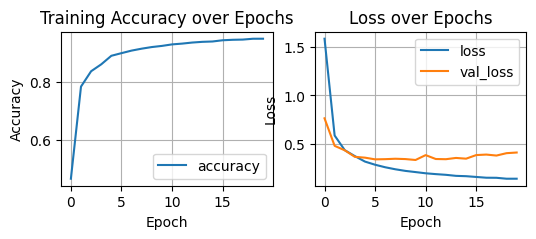

In [25]:
evaluate_convnet(history0)

In [ ]:
# Decreasing/Increasing conv_dim
conv_net1, history1 = create_convnet(conv_dim=(2,2), train_epochs=10)
conv_net2, history2 = create_convnet(conv_dim=(4,4), train_epochs=10)

Minimum validation loss (Epoch 8): 0.3129746913909912
Maximum accuracy achieved: 0.9261851906776428
Minimum validation loss (Epoch 9): 0.2990448474884033
Maximum accuracy achieved: 0.9329444169998169


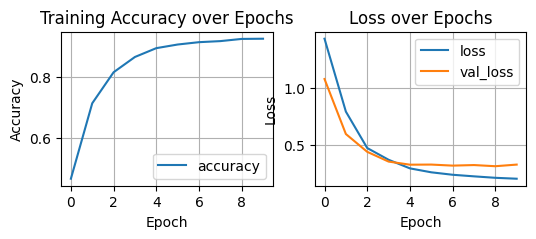

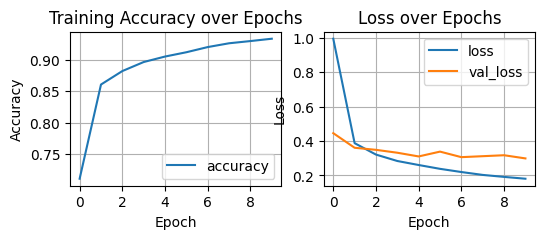

In [52]:
evaluate_convnet(history1)
evaluate_convnet(history2)

In [ ]:
# Increasing size of Max pooling layer
conv_net3, history3 = create_convnet(max_pool=(4,4))

Minimum validation loss (Epoch 8): 0.28542473912239075
Maximum accuracy achieved: 0.9142592549324036


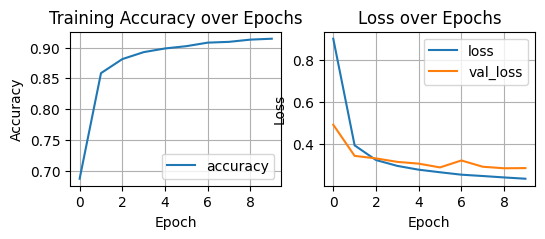

In [53]:
evaluate_convnet(history3)

In [ ]:
# Adding another hidden layer
conv_net4, history4 = create_convnet(nhid_layers=2)

Minimum validation loss (Epoch 7): 0.2954847812652588
Maximum accuracy achieved: 0.9273703694343567


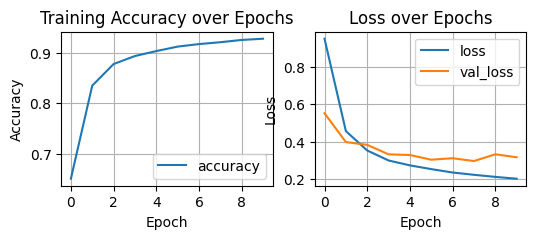

In [54]:
evaluate_convnet(history4)

In [ ]:
# Increasing / Decreasing number of hidden units
conv_net5, history5 = create_convnet(nhid_units=10, train_epochs=8)
conv_net6, history6 = create_convnet(nhid_units=30, train_epochs=8)

Minimum validation loss (Epoch 6): 2.302706241607666
Maximum accuracy achieved: 0.10016666352748871
Minimum validation loss (Epoch 3): 0.3021981418132782
Maximum accuracy achieved: 0.9339073896408081


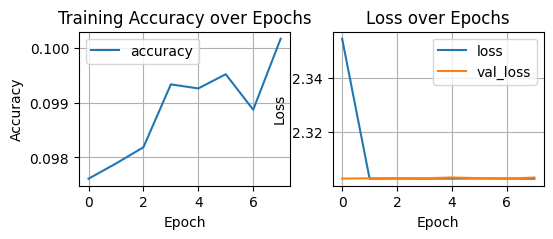

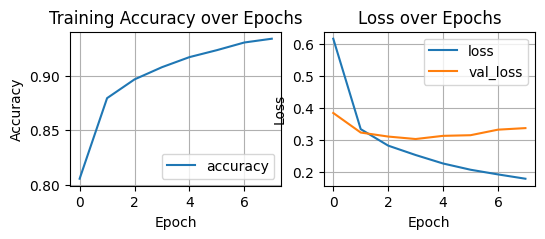

In [55]:
evaluate_convnet(history5)
evaluate_convnet(history6)

In [ ]:
conv_net7, history7 = create_convnet(nfeatures=32, train_epochs=8)

Minimum validation loss (Epoch 5): 0.29968374967575073
Maximum accuracy achieved: 0.9328888654708862


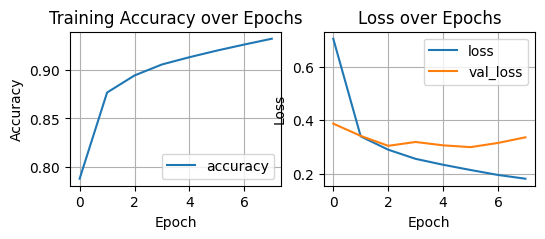

In [56]:
evaluate_convnet(history7)

## Final architecture / paremeters

**Validation of Architecture**
* convolutional layers: 
    * dimensions of convolution - found that **larger kernel sizes** `(4,4)`, `(5,5)` had greater accuracy than smaller kernel sizes
* max_pooling layers 
    * Adding max pooling layers in **alternating** fashion resulted in less overfitting and increased accuracy
* dense layers 
    * number of hidden units - **Increasing hidden units** with `sigmoid` resulted in improved accuracy
    * activations - `sigmoid` activations worked better `relu` (less overfitting)

In [61]:
from tensorflow.keras import models, layers
# based off leNet architecture

def create_convnet2(train_epochs):
    conv_net2 = models.Sequential()
    n_categories = len(flabels)

    # Convolutions layer: 
    ## 5 x 5 kernel + 2 padding
    conv_net2.add(
        layers.Conv2D(
                6, # of feature extractors
                (5,5),  # dimensions of kernel
                strides=(1,1), # granularity with which convlution covers image
                padding="same",
                activation="sigmoid",
                input_shape=(img_x,img_y,1) # include additional dimension for color
                )
    )

    # Pooling layer 2x2 + 2 stride
    conv_net2.add(
        layers.MaxPool2D(
            pool_size=(2,2),
            strides=(2,2)
        )
    )

    # Convolution with 5 x 5 kernel (no pad)
    conv_net2.add(
        layers.Conv2D(
                16,
                (5,5),  # dimensions of convolution
                activation="sigmoid",
                )
    )

    # Pooling layer 2x2 + 2 stride
    conv_net2.add(
        layers.MaxPool2D(
            pool_size=(2,2),
            strides=(2,2)
        )
    )


    conv_net2.add(layers.Flatten())


    conv_net2.add(
        layers.Dense(
            120,
            activation="sigmoid"
        )
    )

    conv_net2.add(
        layers.Dense(
            84,
            activation="sigmoid"
        )
    )

    conv_net2.add(
        layers.Dense(
            n_categories,
            activation="sigmoid"
        )
    )

    conv_net2.compile(
        loss="mean_squared_error",
        optimizer="adam",
        metrics=["accuracy"]
    )
    # Training the network
    history = conv_net2.fit(
        x=train_images,
        y=train_labels_onehot,
        verbose=False,
        validation_split=.1,
        epochs=train_epochs
    )

    return conv_net2, history

In [66]:
final_convnet_classifier0, history_final0 = create_convnet2(train_epochs=20)

Minimum validation loss (Epoch 19): 0.014591631479561329
Maximum accuracy achieved: 0.916092574596405


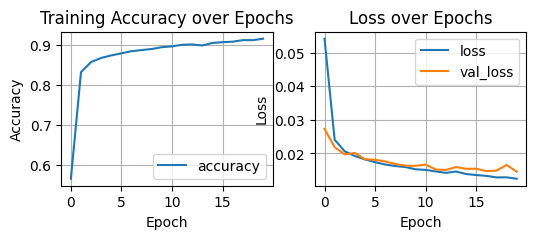

In [67]:
evaluate_convnet(history_final0)

Minimum validation loss (Epoch 29): 0.013697710819542408
Maximum accuracy achieved: 0.9286666512489319


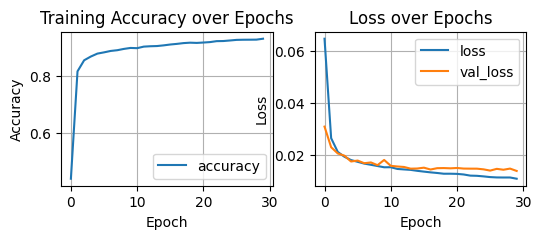

In [62]:
final_convnet_classifier, history_final = create_convnet2(train_epochs=30)
evaluate_convnet(history_final)

### Evaluation of testing images

In [63]:
x = final_convnet_classifier.evaluate(
    x=test_images,
    y=test_labels_onehot,
    )
print(f"""This network achieves an test accuracy of: {x[1]}""")

313/313 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9037
This network achieves an testing accuracy of: 0.9036999940872192
